In [96]:
from pandas import DataFrame, read_csv
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

In [113]:
file1 = pd.read_csv("/Users/nkulkar/Desktop/LearnPython/Homwwork5/Homework5/ride_data.csv")
pd1 = file1.groupby(["city"]).agg({'fare':['mean'],'ride_id':['count']})
pd1.columns = pd1.columns.droplevel(1)
pd1 = pd1.reset_index()
#pd1.head()

In [114]:
file2 = pd.read_csv("/Users/nkulkar/Desktop/LearnPython/Homwwork5/Homework5/city_data.csv")
#print (file2.head())

In [115]:
#Lets merge the data for further use
new_pd = pd.merge_ordered(pd1,file2 , on='city', how='inner')

print(new_pd.head())


           city       fare  ride_id  driver_count      type
0  Alvarezhaven  23.928710       31            21     Urban
1    Alyssaberg  20.609615       26            67     Urban
2    Anitamouth  37.315556        9            16  Suburban
3  Antoniomouth  23.625000       22            21     Urban
4  Aprilchester  21.981579       19            49     Urban


In [100]:
#lets clculate Average Fare ($) Per City
avg_fare_per_city = new_pd.groupby(["city"]).mean()["fare"]

print(avg_fare_per_city.head())

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64


In [101]:
#lets calculate Total Number of Rides Per City
total_num_of_rides_per_city = new_pd.groupby(["city"]).count()["ride_id"]

print(total_num_of_rides_per_city.head())

city
Alvarezhaven    1
Alyssaberg      1
Anitamouth      1
Antoniomouth    1
Aprilchester    1
Name: ride_id, dtype: int64


In [102]:
#Total Number of Drivers Per City
total_num_of_drivers_per_city = new_pd.groupby(["city"]).count()["driver_count"]

print(total_num_of_drivers_per_city.head())

city
Alvarezhaven    1
Alyssaberg      1
Anitamouth      1
Antoniomouth    1
Aprilchester    1
Name: driver_count, dtype: int64


In [116]:
#City Type (Urban, Suburban, Rural)
total_num_of_drivers_by_type = new_pd.groupby(["city"]).max()["type"]

# total_num_of_drivers_by_type = total_num_of_drivers_by_type.sort_values()

new_pd.head()


,city,fare,ride_id,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [117]:
d = {"Rural": 1, "Suburban":2,"Urban":3}
new_pd['type_id'] = new_pd['type'].map(d)
new_pd.head()

,city,fare,ride_id,driver_count,type,type_id
0,Alvarezhaven,23.928710,31,21,Urban,3
1,Alyssaberg,20.609615,26,67,Urban,3
2,Anitamouth,37.315556,9,16,Suburban,2
3,Antoniomouth,23.625000,22,21,Urban,3
4,Aprilchester,21.981579,19,49,Urban,3


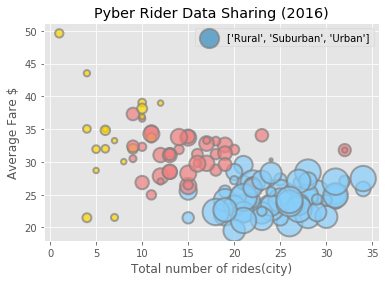

In [118]:
colors = ["Gold", "lightcoral", "lightskyblue"]
cmap = matplotlib.colors.ListedColormap(colors)

#setting axis
x = new_pd.ride_id
y =new_pd.fare
z= new_pd.driver_count
t= new_pd.type_id
labels = ["Rural", "Suburban","Urban"]


# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*10, c=t, cmap=cmap, alpha=0.7,edgecolors='grey', linewidth=2,label= labels )


# Add titles (main and on axis)
plt.xlabel("Total number of rides(city)")
plt.ylabel("Average Fare $")
plt.title("Pyber Rider Data Sharing (2016)")

# and a legend
plt.legend(loc='upper right')
plt.style.use('ggplot')
plt.show() 

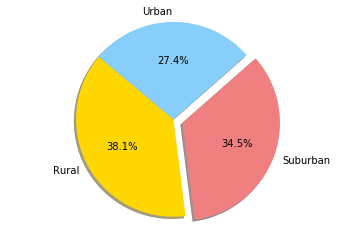

In [119]:
#lets try to create pie charts
#% of Total Fares by City Type

avg_fare_per_city = new_pd.groupby(["city",'type']).mean()["fare"]

avg_fare_by_city_type = new_pd.groupby(['type']).mean()["fare"]

per_rural_fare = avg_fare_by_city_type.values

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban","Urban"]

# The values of each section of the pie chart
fares_by_city = (per_rural_fare)


# The colors of each section of the pie chart
colors = ["Gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0.1,0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(fares_by_city, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()

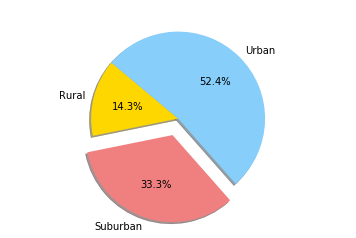

In [120]:
#% of Total Rides by City Type
#total_num_of_rides_per_city

no_rides_by_city_type = new_pd.groupby((['type'])).count()["ride_id"]

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban","Urban"]

# The values of each section of the pie chart
rides_by_city_type = (no_rides_by_city_type)


# The colors of each section of the pie chart
colors = ["Gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0.2,0)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(no_rides_by_city_type, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

# Prints our pie chart to the screen
plt.show()

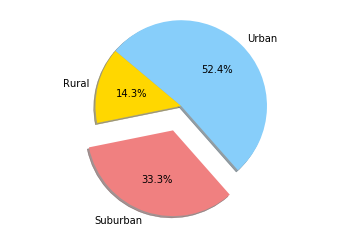

In [121]:
#Total Number of Drivers Per City
total_num_of_drivers_per_city = new_pd.groupby(["type"]).count()["driver_count"]

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban","Urban"]

# The values of each section of the pie chart
Drivers_by_city = (total_num_of_drivers_per_city)

# The colors of each section of the pie chart
colors = ["Gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0.3,0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(Drivers_by_city, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()